In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [4]:
#reading input file for splitting to train and test
df_train = pd.read_csv('/Users/karunparashar/Downloads/mtx/Train_rsmpl.csv')
df = df_train.copy(deep=True)
X_resampled = df.iloc[:,0:52]
y_resampled = df.iloc[:,52]
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.8,test_size=0.2,
                                                    random_state = 7)

In [5]:
#Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier
import time
#defining base classifier
Adb=  AdaBoostClassifier()

#parameters to be tuned
param_grid_ABM = {'learning_rate':[0.01,0.1],
                  "n_estimators" : [100,1000]}

s = time.time()
#grid search initialisation                  
grid_abm = RandomizedSearchCV(Adb, param_grid_ABM, cv = 2,verbose = 3)

#training on model created using grid search
ABM_model = grid_abm.fit(x_train, y_train)
e = time.time()
#predictions based on this model
grid_predictions_ABM = ABM_model.predict(x_test) 
times = e-s
#calculating accuracy
ABM_acc_grid = accuracy_score(y_test,grid_predictions_ABM)


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=100, learning_rate=0.01 ............................
[CV]  n_estimators=100, learning_rate=0.01, score=0.3225560687586305, total=  13.7s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.8s remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.31906281251488167, total=  12.6s
[CV] n_estimators=1000, learning_rate=0.01 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.5s remaining:    0.0s


[CV]  n_estimators=1000, learning_rate=0.01, score=0.4006475882100852, total= 2.0min
[CV] n_estimators=1000, learning_rate=0.01 ...........................
[CV]  n_estimators=1000, learning_rate=0.01, score=0.38682794418781846, total= 1.9min
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV]  n_estimators=100, learning_rate=0.1, score=0.3934336460168563, total=  11.1s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV]  n_estimators=100, learning_rate=0.1, score=0.3991142435354064, total=  11.2s
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV]  n_estimators=1000, learning_rate=0.1, score=0.454216465882577, total= 1.9min
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV]  n_estimators=1000, learning_rate=0.1, score=0.44664031620553357, total= 1.9min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  9.3min finished


In [6]:
ABM_acc_grid

0.4317142857142857

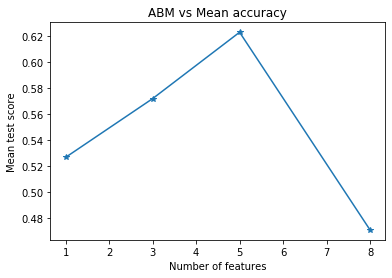

In [12]:
# visualising results based on cross validation by grid search
ABM_grid_results =grid_abm.cv_results_
plt.plot(np.array([1,3,5,8]),ABM_grid_results['mean_test_score'],marker='*')
plt.title('ABM vs Mean accuracy')
plt.xlabel('Number of features') 
plt.ylabel('Mean test score') 
plt.show()

Now we will check the performance of our model against the test resampled data:

In [7]:
#test accuracy check
df_test = pd.read_csv('/Users/karunparashar/Downloads/mtx/Tst_rsmpl.csv')
x_tet = df_test.iloc[:,0:52]
y_tet = df_test.iloc[:,52]
accuracy_score(ABM_model.predict(x_tet),y_tet)

0.4307016375981893

Extracting the best parameters from the trained model using grid search

In [13]:
df_abm= pd.DataFrame(data = ABM_grid_results)
best_params = df_abm.params[df_abm.rank_test_score ==1]
best_params

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.

2    {'n_estimators': 100, 'learning_rate': 0.1}
Name: params, dtype: object

Now we know the best parameter metrics of our best fitted model, let's use it to plot a classification report of our own

In [8]:
cr = classification_report(ABM_model.predict(x_tet),y_tet)
print(cr)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


               precision    recall  f1-score   support

     Ascomoid       0.47      0.37      0.42     18878
Assassin vine       0.08      0.34      0.13      3515
   Basidirond       0.38      0.41      0.39     13636
    Dark tree       0.00      0.00      0.00         0
 Hangman tree       0.64      0.56      0.60     17201
       Kelpie       0.81      0.34      0.48     35454
      Myconid       0.64      0.59      0.62     16470

    micro avg       0.43      0.43      0.43    105154
    macro avg       0.43      0.37      0.38    105154
 weighted avg       0.61      0.43      0.49    105154

